In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/Users/sa15/Desktop/Phase-1-Portfolio-Project/csv/nyc_all_parks_filtered.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            18802 non-null  object 
 1   borough         18802 non-null  object 
 2   location        18802 non-null  object 
 3   event_type      11763 non-null  object 
 4   category        18778 non-null  object 
 5   attendance      18656 non-null  float64
 6   audience        11763 non-null  object 
 7   classification  15679 non-null  object 
 8   time            18802 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [45]:
df.head()

,date,borough,location,event_type,category,attendance,audience,classification,time
0,2002-06-25,Manhattan,Constance Baker Motley Recreation Center,Community Based Event,Arts/Culture,22.0,"Children, Young Adult, Adults, Teens, Seniors,...",NaN,17:00:00
1,2002-06-25,Manhattan,Pelham Fritz Recreation Center,Local Event,Arts/Culture,55.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,16:30:00
2,2002-06-29,Manhattan,White Park,Local Event,Mobile Unit,200.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,00:30:00
3,2002-06-30,Manhattan,Bloomingdale Playground,Local Event,Mobile Unit,125.0,"Tot, Young Adult, Children, Adults, Teens, Ada...",NaN,00:30:00
4,2002-07-02,Manhattan,Abraham Lincoln Playground,Local Event,Mobile Unit,105.0,"Young Adult, Adults, Teens, Adaptive, General ...",NaN,00:30:00


In [46]:
df.columns

Index(['date', 'borough', 'location', 'event_type', 'category', 'attendance',
       'audience', 'classification', 'time'],
      dtype='object')

In [47]:
df.nunique()

date              1815
borough              5
location          1112
event_type           5
category            13
attendance         541
audience           721
classification      35
time               600
dtype: int64

In [48]:
#Counting missing values per column
df.isnull().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

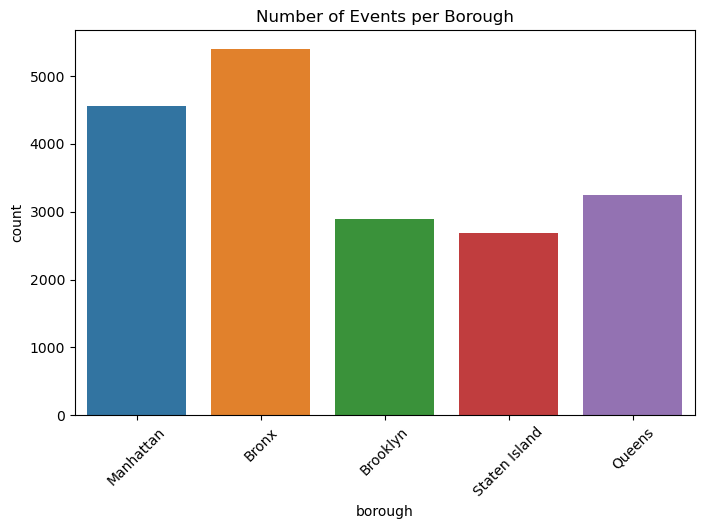

In [49]:
# Below is an Univariate analysis :because it examines a Single  Categorical variable Borough and shows its distribution.

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='borough',hue='borough', )
plt.xticks(rotation=45)
plt.title("Number of Events per Borough")
plt.show()


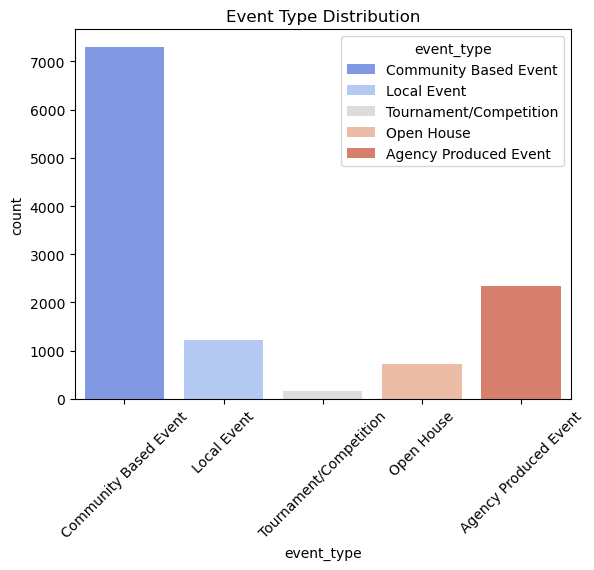

In [50]:
#Below is an Univariate Analysis: Categorical variable Event type and its distribution.
sns.countplot(data=df, x='event_type',hue='event_type', palette='coolwarm')
plt.title('Event Type Distribution')
plt.xticks(rotation=45)
plt.show()


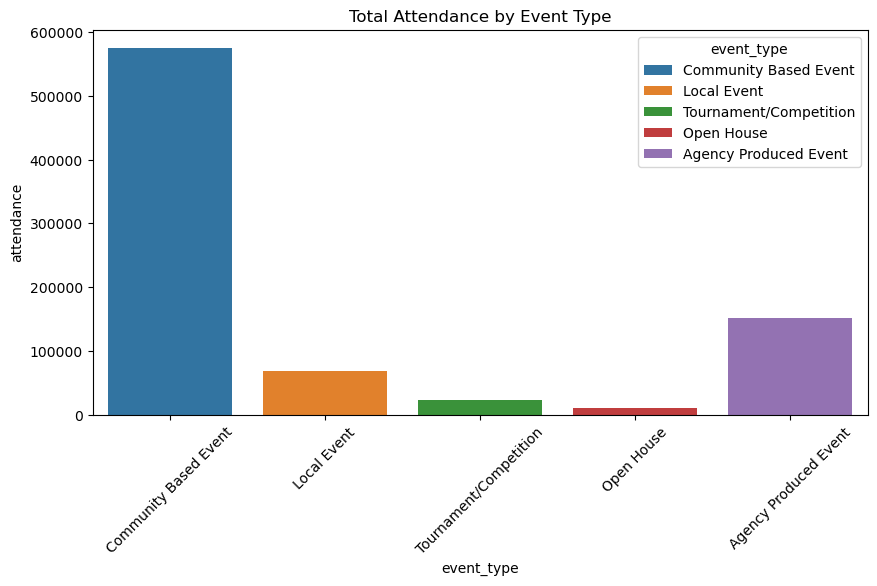

In [51]:
#Below is a Bivariate Analysis :As it examines the relationship between Attendance by event Type.
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='event_type', y='attendance', estimator=sum,hue='event_type',errorbar=None)
plt.xticks(rotation=45)
plt.title("Total Attendance by Event Type")
plt.show()


#Which event type attracts the highest total attendance?
Looks like Community based events attracts a lot more than the other events.


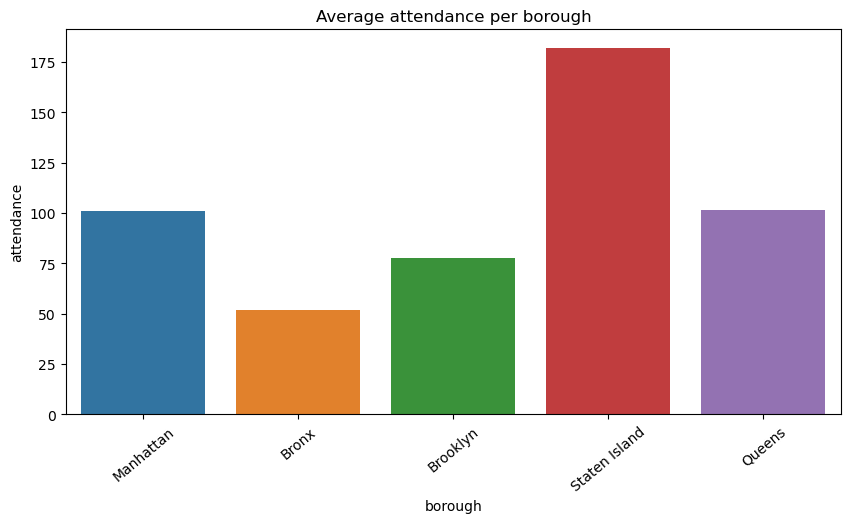

In [52]:
#Below is a Bivariate Analysis : As it examines relationship between 2 variables Attendance & Borough.
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='borough',y='attendance',estimator='mean',hue='borough',errorbar=None,)
plt.xticks(rotation=40)
plt.title('Average attendance per borough')
plt.show()


#Which  borough has the highest attendance  and the lowest  attendance per event?
Staten Island borough events tend to attract the largest crowd on an average.Bronx has the lowest attendace .


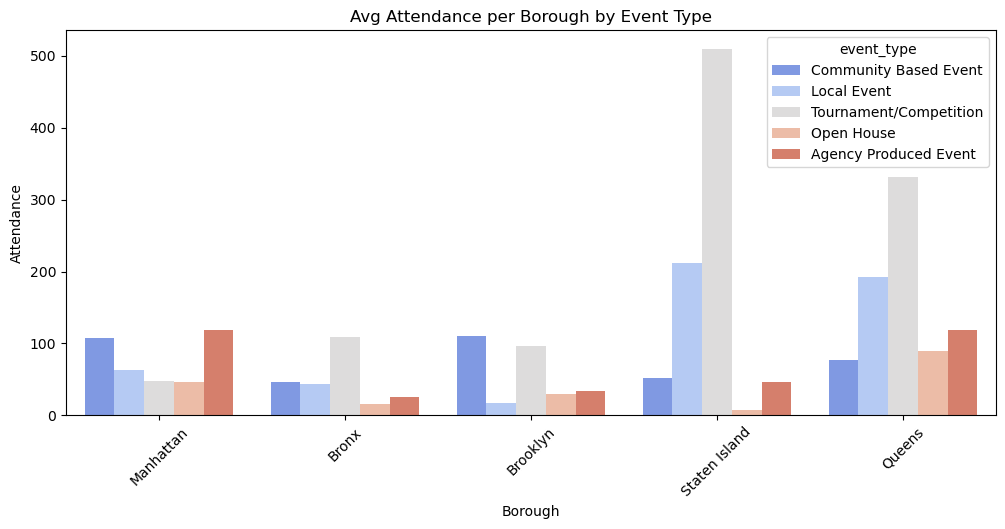

In [53]:
# Below is a Bivariate Analysis as it examines between categorical variable Borough in X axis ,Numerical variable Attendance in y axis .
#Also an additional Categorical variable hue event _type shows another dimention for subgroup comparisons.
plt.figure(figsize=(12, 5))  
sns.barplot(data=df, x='borough', y='attendance', hue='event_type',palette='coolwarm', errorbar=None)
plt.xticks(rotation=45)
plt.title('Avg Attendance per Borough by Event Type')
plt.xlabel('Borough')
plt.ylabel('Attendance')
plt.show()

# Which event types are more popular in specific boroughs?
 Looks like Tournament Competition events are more popular in Bronx, Staten Island , Queens and almost in Brooklyn.Local events are the next most popular in Queens and Staten Island .
# Which Borough has the highest Average attendance?
Looks like Queens have an highest average attendance for Tournament / competition almost 300 attendes . Bronx and Brooklyn has almost 100 attendes for tournaments.

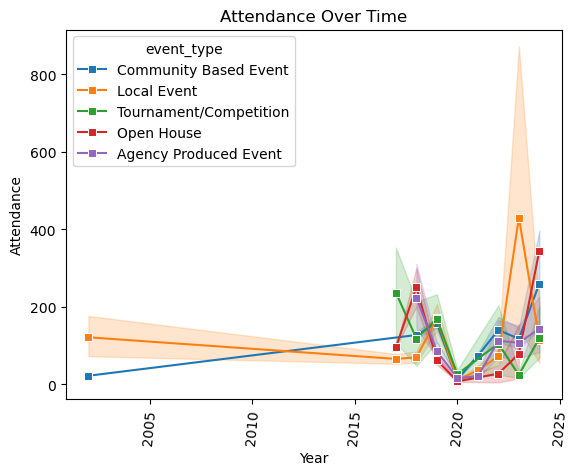

In [54]:
#Converting date to time :
df["date"] = pd.to_datetime(df["date"])  
#Extract year from the date column:
df["year"] = df["date"].dt.year 
sns.lineplot(data=df, x="year", y="attendance", hue='event_type', marker="s")
plt.title("Attendance Over Time")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.xticks(rotation=85)

plt.show()

#The above chart is  a Bivariate analysis: Year (continuous) vs Attendance (continuous), with the addition of a categorical variable (event_type) using hue.
#Categorical variable: event_type is a categorical variable  and show how different event types influence attendance over time.